In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns
import FinancialMachineLearning as fml

### Chapter 16. Machine Learning Asset Allocation

#### Exercise 1
N투자 전략에 주어진 손익 계열이 주어졌을 때,

**(a)** 베팅의 평균 빈도에 손익 계열을 일치시켜라. (예 : 주 단위로 거래하는 전략은 주별 관측값) 힌트 : 빈도에 데이터를 일치시키는 것을 종종 '다운 샘플링'이라고 한다


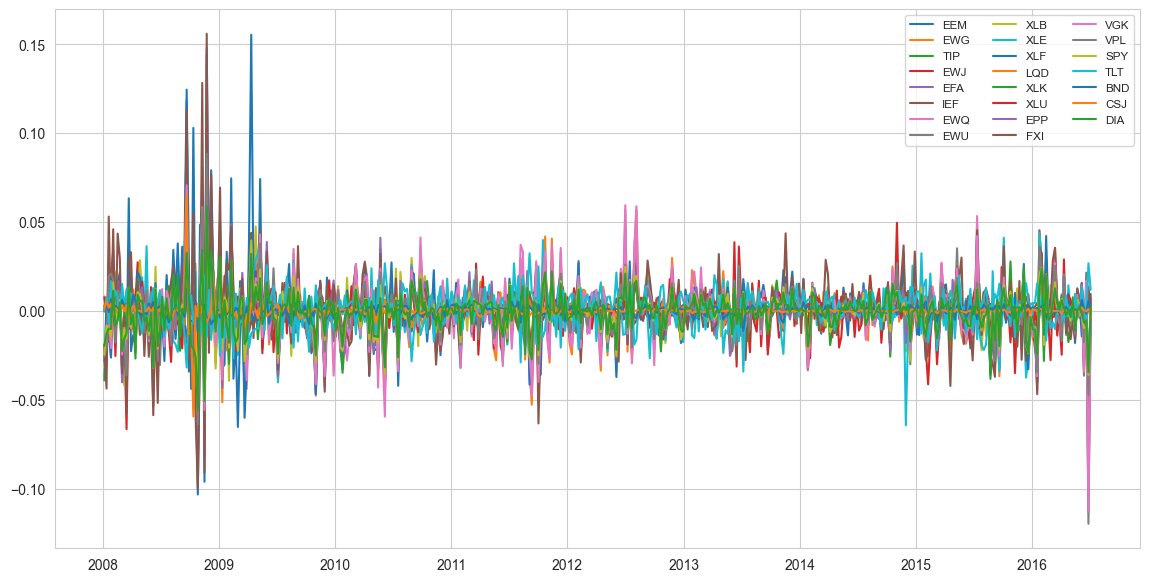

In [2]:
data = pd.read_csv('./Data/stock_prices.csv')
returns = data.drop('Date', axis=1).pct_change()[1:]
returns.index = pd.to_datetime(data['Date'][1:])
returns_weekly = returns.resample('W').last()

fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(returns_weekly)
ax.legend(returns_weekly.columns, fontsize='small', ncol=3)
plt.show()

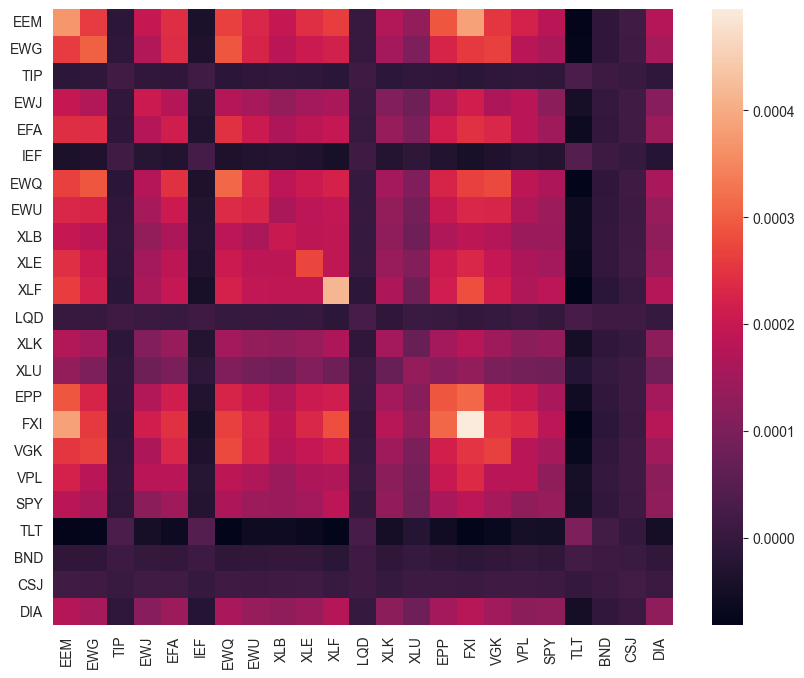

In [3]:
cov = returns_weekly.cov()
fml.plotCorrMatrix(cov, list(returns_weekly.columns), size=(10, 8))

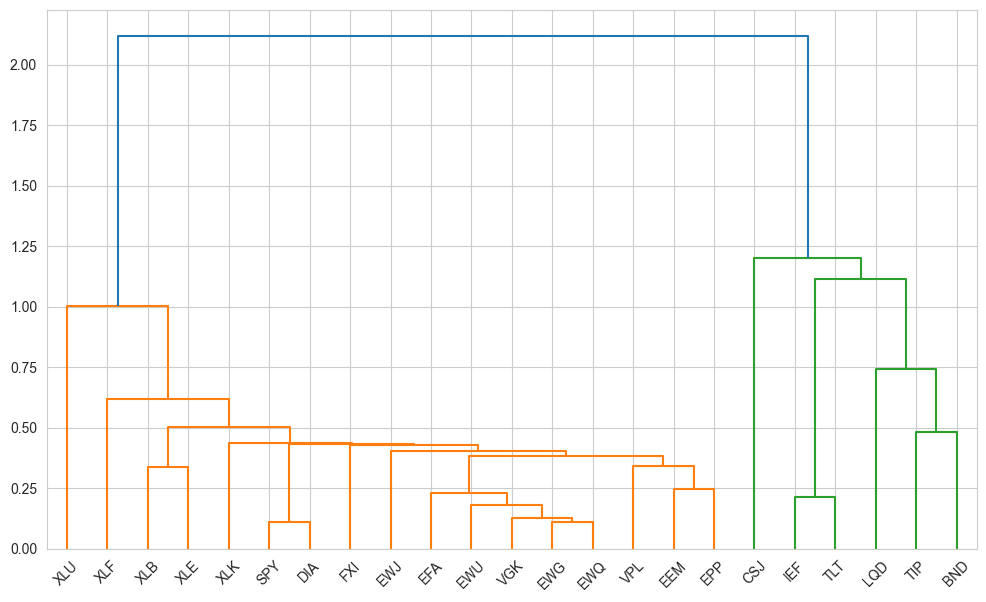

In [4]:
import scipy.cluster.hierarchy as sch

corr = returns_weekly.corr()
dist = fml.correlDist(corr)
link = sch.linkage(corr, 'single')
fig, ax = plt.subplots(figsize=(12, 7))
sch.dendrogram(link, ax=ax, labels=returns_weekly.columns)
plt.show()

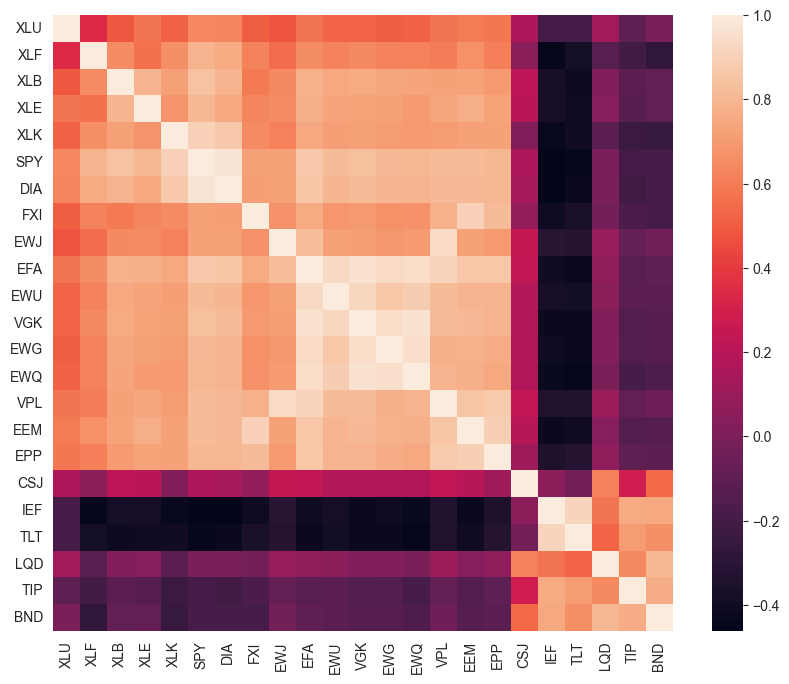

In [5]:
sortIx = fml.getQuasiDiag(link)
sortIx = corr.index[sortIx].tolist()
df0 = corr.loc[sortIx, sortIx]
fml.plotCorrMatrix(df0, labels=list(df0.columns), size=(10, 8))

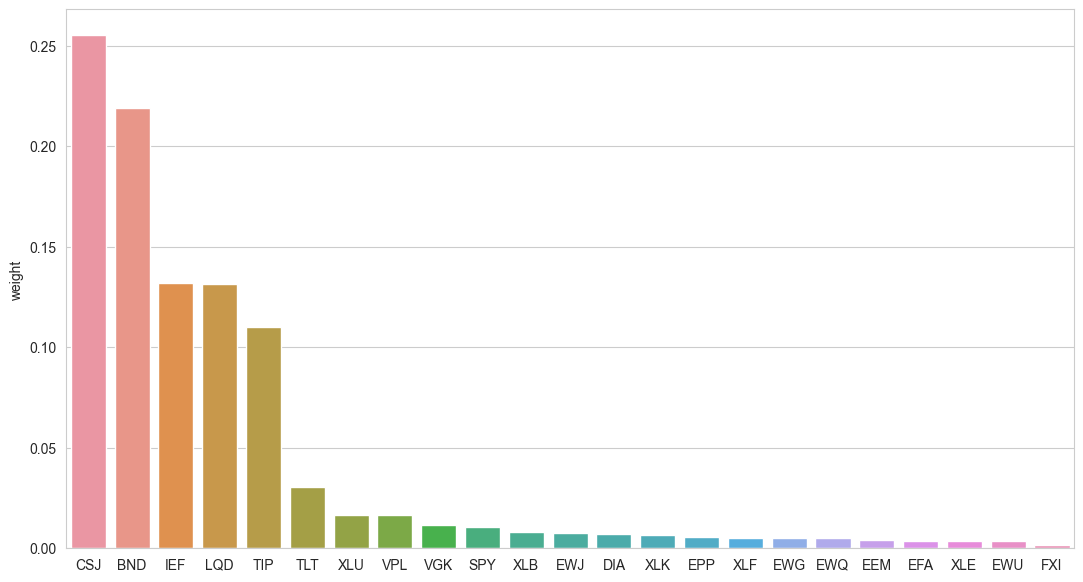

In [6]:
hrp = fml.getRecBipart(cov, sortIx)
hrp_df = pd.DataFrame(hrp.sort_values(ascending=False), columns=['weight'])
fig, ax = plt.subplots(figsize=(13, 7))
ax = sns.barplot(x=hrp_df.index, y=hrp_df['weight'])
plt.show()

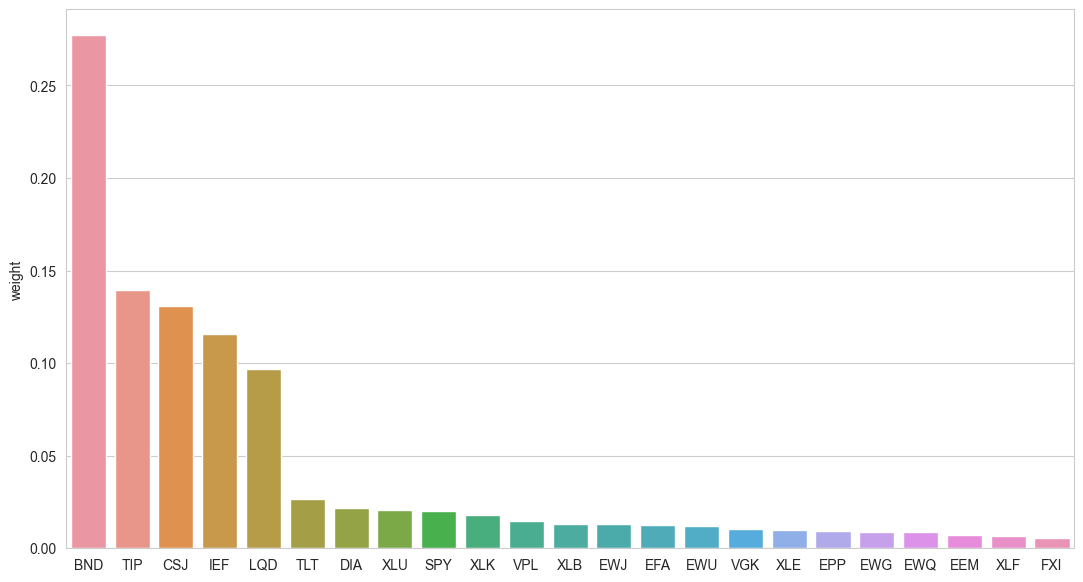

In [8]:
ivp = fml.getIvp(cov)
ivp_df = pd.DataFrame(data=sorted(ivp)[::-1], index=returns_weekly.columns[ivp.argsort()[::-1]], columns=['weight'])
fig, ax = plt.subplots(figsize=(13, 7))
ax = sns.barplot(x=ivp_df.index, y=ivp_df['weight'])
plt.show()